# Problem Statement:

### Simple Linear Regression (Supervised Machine Learning)
In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables.


What will be predicted score if a student study for 9.25 hrs in a day?

In [71]:
#import all the necessary librariees
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#collecting the data
data = pd.read_csv("http://bit.ly/w-data")

In [73]:
#checking top 5 values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
#check how many rows and columns are present in 
data.shape

(25, 2)

In [75]:
X=data.iloc[:,0].values
y=data.iloc[:,1].values

In [76]:
X.shape

(25,)

In [77]:
#check the shape of the output
y.shape

(25,)

## Gradient Descent Method

In [78]:
#initialize m(gradient) and b(intercept) as zero
m=0
b=0

In [79]:
#initializing learning rate and iteration and get the predicted value of y by giving the value of m and b
y_pred=m*X+b
learning_rate=0.00001
iteration=1000

In [80]:
#check the predicted values of y
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

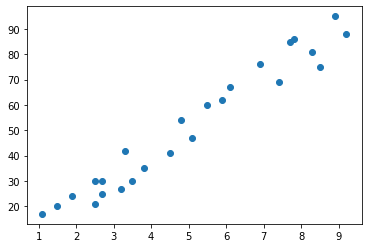

In [81]:
#plotting the X and y
plt.scatter(X,y)

In [82]:
class LinearRegression:
    
    def __init__(self):
        self.m=0
        self.b=0
    
    
    def fit(self,X,y):
        learning_rate=0.0001
        iteration=1000
        for _ in range(iteration):
            y_pred=self.m*X+self.b
            ss_m=(-2) * sum(X * (y-y_pred))
            ss_b=(-2) * sum(y-y_pred)
            stepsize_m=ss_m*learning_rate
            stepsize_b=ss_b*learning_rate
            self.m= self.m- stepsize_m
            self.b= self.b- stepsize_b
        return plt.scatter(X,y),plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)], color="red")
            
    def predict(self,x):
        return self.m*x+self.b

In [83]:
regression=LinearRegression()

(<matplotlib.collections.PathCollection at 0x1de23e193c8>,
 [<matplotlib.lines.Line2D at 0x1de23e196a0>])

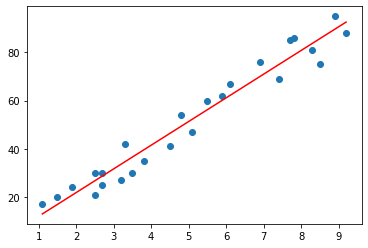

In [84]:
regression.fit(X,y)

In [85]:
print("Hours: 9.25")
print("The Predicted Score: ",regression.predict(9.25))

Hours: 9.25
The Predicted Score:  93.0772853370951


## Ordinary Least Square Method (OLS Method)

In [86]:
#the mean value of X and y
X_mean=np.mean(X)
y_mean=np.mean(y)

In [87]:
#check the function
y_mean

51.48

In [88]:
#the numerator portion of the gradient
m_numerator=(X-X_mean)*(y-y_mean)

In [89]:
#the denominator portion of the gradient
m_denominator=(X-X_mean)**2

In [90]:
#to get the actual gradient of all items of X and y
m=(m_numerator.sum()/m_denominator.sum())

In [91]:
#calculation of intercept
b=y_mean-(m*X_mean)

In [92]:
#the value of gradient
m

9.775803390787473

In [93]:
#the value of intercept
b

2.4836734053731817

In [94]:
#creating a class called LinearRegression which have two methods called fit() and predict()
class LinearRegression_OLS:
    
    def __init__(self):
        self.X_mean=0
        self.y_mean=0
        self.m=0
        self.b=0
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        self.X_mean=np.mean(self.X)
        self.y_mean=np.mean(self.y)
        m_numerator=(self.X-self.X_mean)*(self.y-self.y_mean)
        m_denominator=(self.X-self.X_mean)**2
        self.m=(m_numerator.sum()/m_denominator.sum())
        self.b=self.y_mean-(self.m*self.X_mean)
        
        
    def predict(self,x):
        return self.m*x+self.b

In [95]:
regressor=LinearRegression_OLS()

In [96]:
#fitting the input and output values 
regressor.fit(X,y)

In [97]:
#predict the ouutput from the given input
y_pred_ols=regressor.predict(9.25)

In [98]:
print("Hours: 9.25")
print("The Predicted Score: ",y_pred_ols)

Hours: 9.25
The Predicted Score:  92.90985477015731


## Using Scikit-Learn Toolkit

In [99]:
Xx=data.iloc[:,:-1].values
yy=data.iloc[:, 1].values

In [100]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(Xx,yy,test_size=0.25,random_state=0) 

In [101]:
from sklearn.linear_model import LinearRegression  
regressor_model = LinearRegression()  
regressor_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
Xx.shape

(25, 1)

In [103]:
yy.shape

(25,)

In [104]:
yy_pred=regressor_model.predict(X_test)

In [105]:
from sklearn.metrics import r2_score

In [106]:
r2_score(y_test,yy_pred)

0.9367661043365055

In [107]:
hours=np.array(9.25)
hours=hours.reshape(1,-1)
yy_pred_toolkit=regressor_model.predict(hours)[0]

In [108]:
print("Hours: 9.25")
print("The Predicted Score: ",yy_pred_toolkit)

Hours: 9.25
The Predicted Score:  93.89272889341655
